In [1]:
import requests
from bs4 import BeautifulSoup

Problem Statement:

Extract reviews of any product from ecommerce website like amazon
Perform emotion mining

# IDMB Movie Reviews

In [4]:
# Extracting the movie reviews from IMDB website

url = "http://www.imdb.com/title/tt3521164/reviews?ref_=tt_urv"
resp = requests.get(url)
print(resp.status_code)
#print(resp.content)
soup = BeautifulSoup(resp.text,"html.parser")
#soup.prettify()


200


In [5]:
reviews = soup.findAll("div", attrs={"class","text"})
print(type(reviews))
for i in range(len(reviews)):
    reviews[i] = reviews[i].text

<class 'bs4.element.ResultSet'>


In [13]:
# Creating a data frame 
import pandas as pd
movie_reviews = pd.DataFrame(reviews, columns = ["reviews"])
movie_reviews

,reviews
0,"""Moana"" is the latest full length animated fil..."
1,"Despite being a lifelong Disney fan, that is n..."
2,I'm not the target market for these Disney ani...
3,Moana (2016) *** 1/2 (out of 4)Beautiful looki...
4,Moana is told the story of Maui (Dwayne Johnso...
5,"This is a very well done animated feature, usi..."
6,I have been a bit leery of DIsney Princess mov...
7,"Set on the Polynesian island of Motunui, the l..."
8,It was my daughter that meant I watched this f...
9,The chief's daughter Moana (Auli'i Cravalho) m...


In [8]:
movie_reviews.shape

(25, 1)

# Text Mining 

In [9]:
import string 
import spacy
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing The Data

In [14]:
movie_reviews = [reviews.strip() for reviews in movie_reviews.reviews]

In [15]:
movie_reviews = [reviews for reviews in movie_reviews if reviews]           # removing the empty strings from the data
movie_reviews[0:25]

['"Moana" is the latest full length animated film from Disney and it\'s a worthy successor to its last CGI success, "Zootopia". While the film isn\'t perfect, it is very enjoyable and original.The story in "Moana" is based y loosely on Polynesian folklore\x85in particular, their trickster demigod, Maui (Dwayne Johnson). Because of Maui\'s actions, nature is very slowly dying off and ruin is coming for Moana and her people. However, Moana\'s father, the Chief, is afraid of what lies beyond their island and forbids Moana from leaving on a journey to try to restore the lost heart to the Island Mother. Using pluck and determination, and with a bit of help from Maui, Moana makes this journey. This synopsis might sound very strange and confusing\x85and it\'s best you just see the film for yourself. Suffice to say, it is a real crowd pleaser due to an interesting, stunning computer animation and very original story as well as some interesting characters. I particularly liked Moana as she was 

In [16]:
# joining the list of comments into a single text/string

text = ' '.join(movie_reviews)

In [17]:
len(text)

39143

# Lets Remove Punctuation Marks

In [18]:
no_punc_text = text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'Moana is the latest full length animated film from Disney and its a worthy successor to its last CGI success Zootopia While the film isnt perfect it is very enjoyable and originalThe story in Moana is based y loosely on Polynesian folklore\x85in particular their trickster demigod Maui Dwayne Johnson Because of Mauis actions nature is very slowly dying off and ruin is coming for Moana and her people However Moanas father the Chief is afraid of what lies beyond their island and forbids Moana from leaving on a journey to try to restore the lost heart to the Island Mother Using pluck and determination and with a bit of help from Maui Moana makes this journey This synopsis might sound very strange and confusing\x85and its best you just see the film for yourself Suffice to say it is a real crowd pleaser due to an interesting stunning computer animation and very original story as well as some interesting characters I particularly liked Moana as she was strong and likable\x85and not someone n

## Tokenization 

In [19]:
import nltk
from nltk.tokenize import word_tokenize

In [23]:
tokens = word_tokenize(no_punc_text)
tokens[0:25]

['Moana',
 'is',
 'the',
 'latest',
 'full',
 'length',
 'animated',
 'film',
 'from',
 'Disney',
 'and',
 'its',
 'a',
 'worthy',
 'successor',
 'to',
 'its',
 'last',
 'CGI',
 'success',
 'Zootopia',
 'While',
 'the',
 'film',
 'isnt']

In [21]:
nltk.download('punkt')      
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [22]:
tokens = word_tokenize(no_punc_text)
tokens[0:25]

['Moana',
 'is',
 'the',
 'latest',
 'full',
 'length',
 'animated',
 'film',
 'from',
 'Disney',
 'and',
 'its',
 'a',
 'worthy',
 'successor',
 'to',
 'its',
 'last',
 'CGI',
 'success',
 'Zootopia',
 'While',
 'the',
 'film',
 'isnt']

In [24]:
len(tokens)

6872

## Lets Remove Stopwards

In [26]:
from nltk.corpus import stopwords
text_stopwords = stopwords.words("english")
text_stopwords.append('an')
no_stop_words = [word for word in tokens if not word in text_stopwords]
no_stop_words[:25]

['Moana',
 'latest',
 'full',
 'length',
 'animated',
 'film',
 'Disney',
 'worthy',
 'successor',
 'last',
 'CGI',
 'success',
 'Zootopia',
 'While',
 'film',
 'isnt',
 'perfect',
 'enjoyable',
 'originalThe',
 'story',
 'Moana',
 'based',
 'loosely',
 'Polynesian',
 'folklore']

## Normalization Of Text

In [27]:
lower_words = [text.lower() for text in no_stop_words]
lower_words[0:25]

['moana',
 'latest',
 'full',
 'length',
 'animated',
 'film',
 'disney',
 'worthy',
 'successor',
 'last',
 'cgi',
 'success',
 'zootopia',
 'while',
 'film',
 'isnt',
 'perfect',
 'enjoyable',
 'originalthe',
 'story',
 'moana',
 'based',
 'loosely',
 'polynesian',
 'folklore']

## Stemming

In [28]:
from nltk.stem import PorterStemmer

In [29]:
ps = PorterStemmer()

In [30]:
stem_words = [ps.stem(word) for word in lower_words]
stem_words[0:25]

['moana',
 'latest',
 'full',
 'length',
 'anim',
 'film',
 'disney',
 'worthi',
 'successor',
 'last',
 'cgi',
 'success',
 'zootopia',
 'while',
 'film',
 'isnt',
 'perfect',
 'enjoy',
 'originalth',
 'stori',
 'moana',
 'base',
 'loos',
 'polynesian',
 'folklor']

## Lematization

In [35]:
nlp = spacy.load("en_core_web_sm")

In [34]:
!python -m spacy download en

     -------------------------------------- 13.9/13.9 MB 750.3 kB/s eta 0:00:00
[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [36]:
# joining the stopwords into a paragraph

doc = nlp(' '.join(no_stop_words))
doc[0:25]

Moana latest full length animated film Disney worthy successor last CGI success Zootopia While film isnt perfect enjoyable originalThe story Moana based loosely Polynesian

In [37]:
lemmas = [token.lemma_ for token in doc]
lemmas[:25]

['Moana',
 'late',
 'full',
 'length',
 'animate',
 'film',
 'Disney',
 'worthy',
 'successor',
 'last',
 'cgi',
 'success',
 'Zootopia',
 'while',
 'film',
 'be',
 'not',
 'perfect',
 'enjoyable',
 'originalthe',
 'story',
 'Moana',
 'base',
 'loosely',
 'polynesian']

## POS Tagging

In [39]:
one_block = movie_reviews[15]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [42]:
# getting the tokens and pos tags for the tokens

for tokens in doc_block[0:25]:
    print(tokens,tokens.pos_)

This DET
film NOUN
tells VERB
the DET
story NOUN
of ADP
a DET
daughter NOUN
of ADP
a DET
Polynesian ADJ
chief NOUN
, PUNCT
who PRON
is AUX
fascinated VERB
by ADP
the DET
ocean NOUN
. PUNCT
However ADV
, PUNCT
the DET
chief NOUN
forbids VERB


In [43]:
# extracting the nouns and verbs
noun_verbs = [token.text for token in doc_block if token.pos_ in ("NOUN","VERB")]
print(noun_verbs[0:25])

['film', 'tells', 'story', 'daughter', 'chief', 'fascinated', 'ocean', 'chief', 'forbids', 'sail', 'reefs', 'fishing', 'island', 'waters', 'are', 'moments', 'scene', 'hair', 'slaps', 'face', 'comment', 'giving', 'sky', 'coconuts', 'think']


## Getting The Word count

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(noun_verbs)
sum_words = X.sum(axis = 0)
word_freq = [(word, sum_words[0,idx]) for word, idx in vectorizer.vocabulary_.items()]
word_freq = sorted(word_freq, key = lambda x: x[1], reverse = True)
wf_df= pd.DataFrame(word_freq)
wf_df.columns = ['words', 'count']
wf_df[0:15]

,words,count
0,film,5
1,think,3
2,chief,2
3,coconuts,2
4,part,2
5,crab,2
6,songs,2
7,tells,1
8,story,1
9,daughter,1


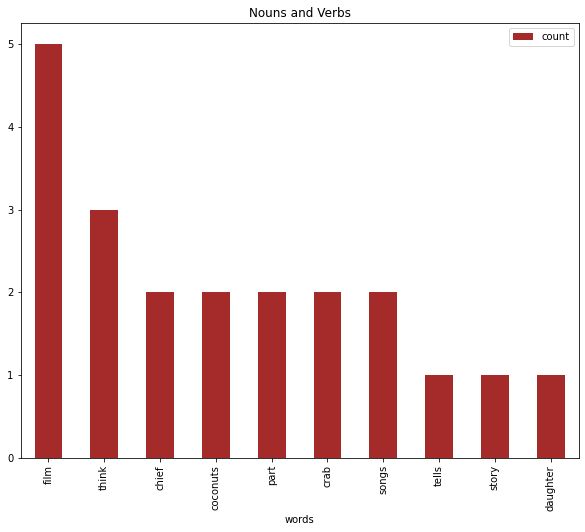

In [49]:
wf_df[0:10].plot.bar(x = 'words', title = 'Nouns and Verbs', figsize = (10,8),color = 'brown');

## Sentiment Analysis

In [50]:
afinn = pd.read_csv("Afinn.csv")

In [51]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [53]:
afinn.shape

(2477, 2)

In [54]:
from itertools import islice

def take(n,iterable):
    return list(islice(iterable, n))

In [56]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [57]:
take(15,affinity_scores)

['abandon',
 'abandoned',
 'abandons',
 'abducted',
 'abduction',
 'abductions',
 'abhor',
 'abhorred',
 'abhorrent',
 'abhors',
 'abilities',
 'ability',
 'aboard',
 'absentee',
 'absentees']

In [58]:
from nltk import tokenize

In [59]:
sentence = tokenize.sent_tokenize(' '.join(movie_reviews))
sentence[5:15]

["This synopsis might sound very strange and confusing\x85and it's best you just see the film for yourself.",
 'Suffice to say, it is a real crowd pleaser due to an interesting, stunning computer animation and very original story as well as some interesting characters.',
 'I particularly liked Moana as she was strong and likable\x85and not someone needing rescuing.',
 "But she also wasn't harsh or stereotypical\x85just determined.",
 "I also loved her pet sidekick, as this chicken is nothing like any Disney sidekick\x85and you'll soon realize this animal is possibly the dumbest in Disney history\x85as well as very funny.. As for Dwayne Johnson ('The Rock') he was also very good\x85and I was surprised that he had a decent singing voice in the film.",
 'As for the singing in general, however, this is the weakest aspect of the film.',
 'While most of the songs are enjoyable, a few are quite forgettable and none have that singability you look for in a full-length Disney cartoon.',
 "You'll

In [60]:
sent_df = pd.DataFrame(sentence, columns = ['sentences'])
sent_df

,sentences
0,"""Moana"" is the latest full length animated fil..."
1,"While the film isn't perfect, it is very enjoy..."
2,"Because of Maui's actions, nature is very slow..."
3,"However, Moana's father, the Chief, is afraid ..."
4,"Using pluck and determination, and with a bit ..."
...,...
274,.
275,weren't.
276,"The songs are good, the animation's beautiful,..."
277,"Having said that, you could do with a lot worse."


In [61]:
nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_scores

In [62]:
def calculate_sentiment(text: str = None)->float:
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [63]:
calculate_sentiment("never poor")

-2

In [64]:
# Getting the word count from sentences

sent_df['word_count'] = sent_df['sentences'].str.split().apply(len)
sent_df['word_count'].head(25)

0     21
1     29
2     19
3     32
4     16
5     18
6     26
7     15
8      9
9     58
10    15
11    25
12    29
13    28
14    28
15    17
16    20
17    40
18    63
19    25
20    34
21    46
22    71
23    17
24    27
Name: word_count, dtype: int64

In [65]:
sent_df['sentiment_scores'] = sent_df['sentences'].apply(calculate_sentiment)
sent_df

,sentences,word_count,sentiment_scores
0,"""Moana"" is the latest full length animated fil...",21,4
1,"While the film isn't perfect, it is very enjoy...",29,3
2,"Because of Maui's actions, nature is very slow...",19,-5
3,"However, Moana's father, the Chief, is afraid ...",32,-5
4,"Using pluck and determination, and with a bit ...",16,2
...,...,...,...
274,.,1,0
275,weren't.,1,0
276,"The songs are good, the animation's beautiful,...",28,8
277,"Having said that, you could do with a lot worse.",10,-3


In [66]:
sent_df.sort_values(by = 'sentiment_scores').tail(20)

,sentences,word_count,sentiment_scores
176,Disney really seem to be on a run of good form...,53,8
56,Throw in some nice laughs and MOANA really is ...,14,8
6,"Suffice to say, it is a real crowd pleaser due...",26,8
276,"The songs are good, the animation's beautiful,...",28,8
18,"Of the ""2nd Renaissance""/""Disney Revival"" peri...",63,8
9,"I also loved her pet sidekick, as this chicken...",58,9
211,"Enchanting as a child, and engaging as a curio...",29,9
205,It's nice to see a spunky female heroine of co...,51,9
45,There are a lot of great things about this pic...,44,9
135,Cravalho has a beautiful singing voice and voi...,29,9


In [67]:
sent_df[sent_df['sentiment_scores']>=15]

,sentences,word_count,sentiment_scores
136,"The animation is fantastic, it is good to have...",62,35


In [68]:
sent_df[sent_df['sentiment_scores']<0]

,sentences,word_count,sentiment_scores
2,"Because of Maui's actions, nature is very slow...",19,-5
3,"However, Moana's father, the Chief, is afraid ...",32,-5
10,"As for the singing in general, however, this i...",15,-2
19,"It was however difficult to fault 'Moana', bec...",25,-1
20,There have been criticisms regarding a formula...,34,-9
29,"There is something for everybody, never too co...",26,-3
34,"If anybody does find him dumb or annoying, thi...",33,-7
39,"As usual, the slick and soulless animation sty...",47,-2
42,"As a teen, Moana's island comes under a curse ...",27,-1
43,"I had avoided watching this, although my two-y...",19,-1


In [69]:
string = " ".join(sent_df["sentences"])

In [74]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

In [73]:
! pip install wordcloud

     -------------------------------------- 155.9/155.9 KB 1.6 MB/s eta 0:00:00


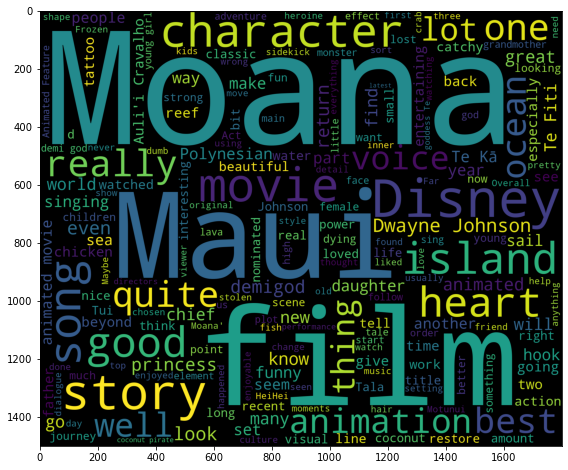

In [75]:
from wordcloud import WordCloud
plt.figure(figsize = (15,8))
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(string)
plt.imshow(wordcloud_stw)

## Visualizing Sentiment Score

In [77]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='sentiment_scores', ylabel='Density'>

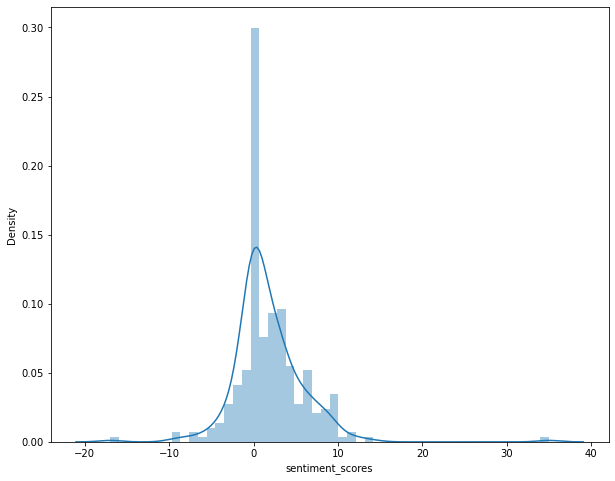

In [78]:
plt.figure(figsize = (10,8))
sns.distplot(sent_df['sentiment_scores'])

<AxesSubplot:ylabel='sentiment_scores'>

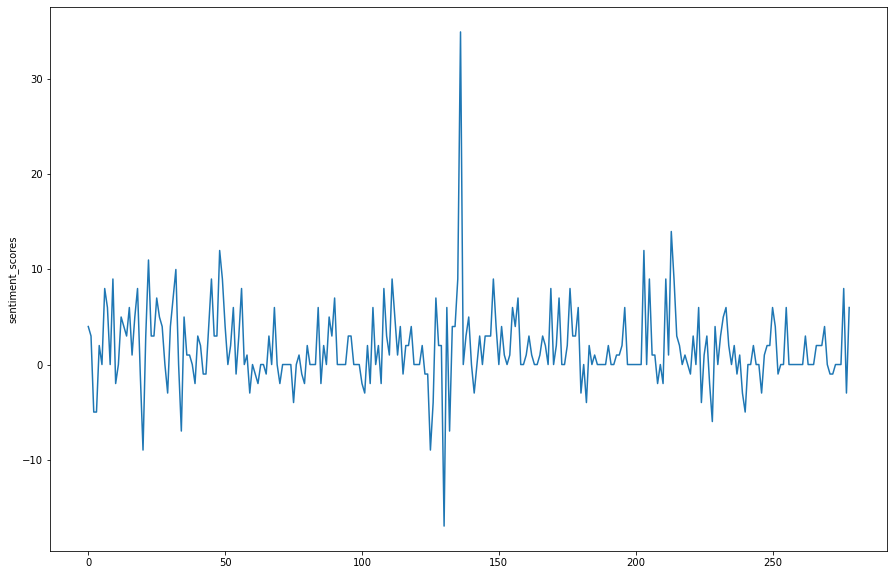

In [79]:
plt.figure(figsize=(15,10))
sns.lineplot(x = sent_df.index, y = sent_df['sentiment_scores'], data = sent_df)

Inference : The maximum score we are having is 16 and minimum is -9